## Analysis of Sales Data From January 2019 to December 2019

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### Merging 12 months data into a single file.



In [2]:
df= pd.read_csv("/Users/ravi/Desktop/python/Pandas-Data-Science/SalesAnalysis/Sales_Data/Sales_april_2019.csv")

df.head()

files= [file for file in os.listdir('/Users/ravi/Desktop/python/Pandas-Data-Science/SalesAnalysis/Sales_Data/')]
all_months_data= pd.DataFrame()
for file in files:
    df1= pd.read_csv("/Users/ravi/Desktop/python/Pandas-Data-Science/SalesAnalysis/Sales_Data/"+file)
    all_months_data= pd.concat([all_months_data, df1])
    

all_months_data.head(10)
all_months_data.to_csv("all_data.csv", index= False)

### Read In Updated DataFrame

In [4]:
All_months_data =pd.read_csv("all_data.csv")
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up the data

In [5]:

nan_df = all_months_data[all_months_data.isna() .any (axis=1)]
nan_df.head (50)

all_months_data =all_months_data.dropna(how='all')
all_months_data.head ()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Filter Irregular Data


In [6]:
all_months_data= all_months_data[all_months_data[ 'Order Date'].str [0:2] != 'Or']
all_months_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


### Convert columns to required Data type.

In [7]:
all_months_data['Quantity Ordered']= all_months_data['Quantity Ordered'].astype('int')
all_months_data['Price Each']= all_months_data['Price Each'].astype('float')

### Augment data with additional columns

### Task 2: Add Month Column

In [8]:
all_months_data['Month']= all_months_data[ 'Order Date'].str[0:2]
all_months_data['Month']= all_months_data['Month'].astype('int32')
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


### Q-1: What was the best month of sales? How much was earned that month?

#### Adding a sales column

In [9]:
all_months_data['sales']= all_months_data['Quantity Ordered']* all_months_data['Price Each']
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


In [24]:
results= all_months_data.groupby('Month').sum()
#results['Month'](results['sales'].max())
results['sales']
results.sort_values(by= 'sales', ascending=False)

/var/folders/xg/g1wspk597n71rp310cb20lbh0000gn/T/ipykernel_81425/1870682059.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results= all_months_data.groupby('Month').sum()


,Quantity Ordered,Price Each,sales,Hour,Minute
Month,,,,,
12,28114,4588415.41,4613443.34,359978,733082
10,22703,3715554.83,3736726.88,290650,598437
4,20558,3367671.02,3390670.24,262259,544186
11,19798,3180600.68,3199603.20,254865,518231
5,18667,3135125.13,3152606.75,238780,487899
3,17005,2791207.83,2807100.38,218969,447559
7,16072,2632539.56,2647775.76,206169,417349
6,15253,2562025.61,2577802.26,195528,402436
8,13448,2230345.42,2244467.88,172289,353857


### December has recorded the Highest sales


Text(0.5, 0, 'Month number')

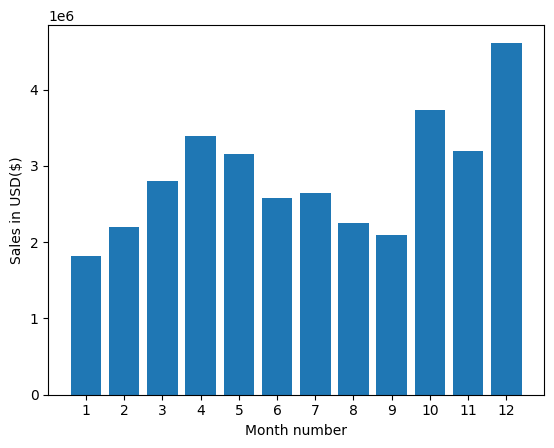

In [11]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results['sales'])
plt.show
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')

### Q-2: what City had the highest number of sales?

### adding city column

In [12]:
all_months_data['City']= all_months_data['Purchase Address'].apply(lambda x: x.split(',')[1]) + ' ' + '(' + (all_months_data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1]))+')'

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


### Q-3: which city has the highest sales??

In [13]:
Total_sum_sales= all_months_data.groupby('City').sum()
Total_sum_sales.sort_values('sales',ascending = False)

/var/folders/xg/g1wspk597n71rp310cb20lbh0000gn/T/ipykernel_81425/1011798955.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Total_sum_sales= all_months_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,sales
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58
Dallas (TX),16730,2752627.82,104620,2767975.40
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


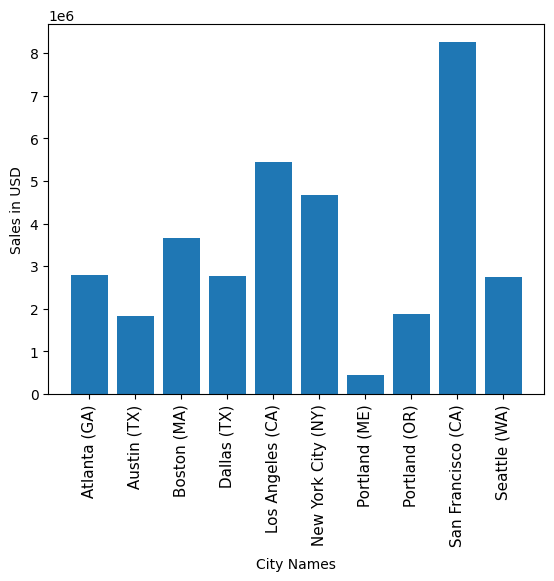

In [14]:

cities= [ city for city, df in all_months_data.groupby('City')]
plt.bar(cities, Total_sum_sales['sales'])
plt.xticks(cities, rotation='vertical',size = 11)

plt.xlabel('City Names')
plt.ylabel('Sales in USD')
plt.show()

### A- San Francisco had the highest sales

### Q-4: What time should we display advertisements to maximize likelihood of customer's buying product?

In [25]:
all_months_data['Order Date']= pd.to_datetime(all_months_data['Order Date'])

In [26]:
all_months_data[ 'Hour'] = all_months_data['Order Date'].dt.hour
all_months_data[ 'Minute'] = all_months_data['Order Date'].dt.minute

all_months_data.sort_values(by=['Hour'], ascending=True)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
8748,231266,Wired Headphones,1,11.99,2019-07-26 00:24:00,"947 Church St, Dallas, TX 75001",7,11.99,Dallas (TX),0,24
7251,285731,AAA Batteries (4-pack),4,2.99,2019-12-01 00:02:00,"786 Hill St, San Francisco, CA 94016",12,11.96,San Francisco (CA),0,2
6072,147012,Vareebadd Phone,1,400.00,2019-01-23 00:48:00,"975 Lakeview St, San Francisco, CA 94016",1,400.00,San Francisco (CA),0,48
13540,174937,iPhone,1,700.00,2019-03-23 00:26:00,"284 14th St, Austin, TX 73301",3,700.00,Austin (TX),0,26
...,...,...,...,...,...,...,...,...,...,...,...
16538,209827,Wired Headphones,1,11.99,2019-05-17 23:32:00,"391 Spruce St, San Francisco, CA 94016",5,11.99,San Francisco (CA),23,32
11593,270425,Apple Airpods Headphones,1,150.00,2019-10-10 23:17:00,"292 Highland St, Los Angeles, CA 90001",10,150.00,Los Angeles (CA),23,17
6637,156836,AAA Batteries (4-pack),1,2.99,2019-02-14 23:15:00,"18 4th St, Seattle, WA 98101",2,2.99,Seattle (WA),23,15
16490,209783,AA Batteries (4-pack),3,3.84,2019-05-14 23:26:00,"859 Pine St, San Francisco, CA 94016",5,11.52,San Francisco (CA),23,26


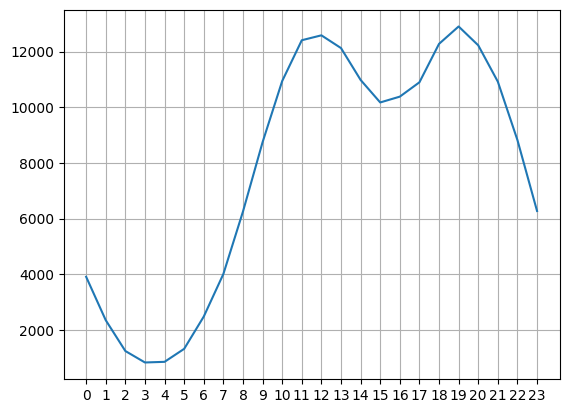

In [27]:
hours = [hour for hour, df in all_months_data.groupby('Hour')]
y= all_months_data.groupby(['Hour']).count()
plt.plot(hours,y['Order Date'])
plt.xticks(hours)
plt.grid()
plt.show()

### A- 11:00 to 12:00 and 19:00 is better time.

### Q-5: What products are most often sold together??

In [18]:
sell= all_months_data[all_months_data['Order ID'].duplicated(keep= False)]

sell['Grouped']= sell.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

sell= sell[['Order ID', 'Grouped']].drop_duplicates()
sell.head(50)



/var/folders/xg/g1wspk597n71rp310cb20lbh0000gn/T/ipykernel_81425/7162551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell['Grouped']= sell.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [19]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in sell['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2)))
    

count.most_common(10)

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### A- Iphone and Lightning Charging Cable sold the most with together sales of Two products

### Q-5: What products sold the most? and why?

/var/folders/xg/g1wspk597n71rp310cb20lbh0000gn/T/ipykernel_81425/4161397909.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Quantity_ordered= Product_group.sum()['Quantity Ordered']


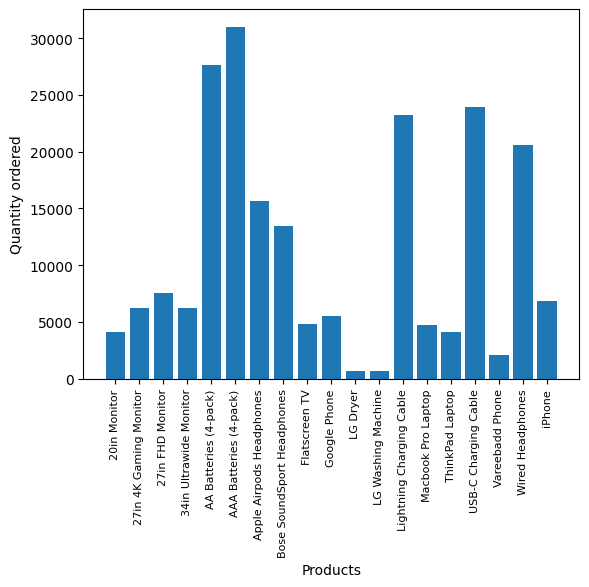

In [20]:
Product_group= all_months_data.groupby('Product')
Quantity_ordered= Product_group.sum()['Quantity Ordered']

products= [product for product, df in Product_group]
plt.bar(products, Quantity_ordered)

plt.xticks(products, rotation= 'vertical', size= 8)
plt.xlabel('Products')
plt.ylabel('Quantity ordered')
plt.show()

/var/folders/xg/g1wspk597n71rp310cb20lbh0000gn/T/ipykernel_81425/2003849370.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_months_data.groupby('Product').mean()['Price Each']
/var/folders/xg/g1wspk597n71rp310cb20lbh0000gn/T/ipykernel_81425/2003849370.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation= 'vertical', size= 8)


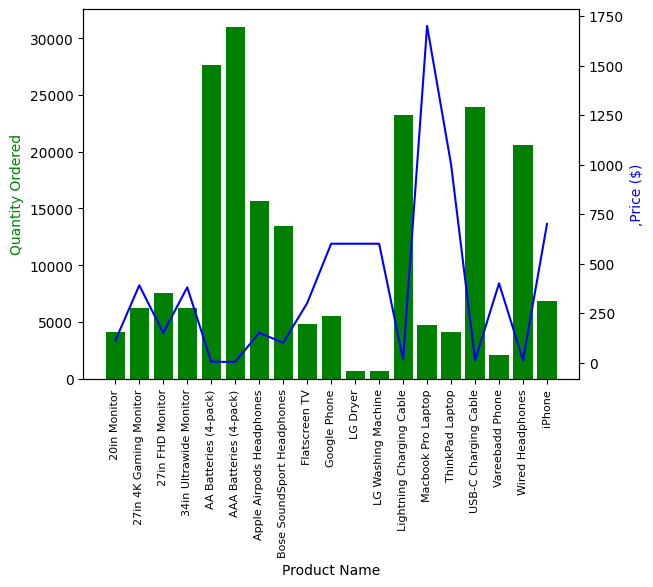

In [21]:
prices = all_months_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots ()
ax2 = ax1.twinx ()
ax1.bar(products, Quantity_ordered,color= 'g') 
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color= 'g')
ax2.set_ylabel(',Price ($)', color='b')
ax1.set_xticklabels(products, rotation= 'vertical', size= 8)
plt.show()

### A- Low price products are sold more and products like Macbooks are sold more because of reqiurements and Students, etc.